In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2022/train.csv
/kaggle/input/tabular-playground-series-feb-2022/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

warnings.filterwarnings('ignore')

# Tabular Playground Series - Feb 2022

The tabular series on kaggle are meant to help novices in data science field to get acquainted with kaggle competitions.

For this challenge the task is to classify 10 different bacteria species using data from a genomic analysis technique that has some data compression and data loss. 

# Exploratory Data Analysis

# Train dataset

Lets first explore the train dataset and subsequently the test dataset.

In [3]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2022/train.csv')

In [4]:
train_df.head()

row_id     A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0       0 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   
1       1 -9.536743e-07 -0.000010 -0.000043  0.000886 -0.000200  0.000760   
2       2 -9.536743e-07 -0.000002  0.000007  0.000129  0.000268  0.000270   
3       3  4.632568e-08 -0.000006  0.000012  0.000245  0.000492  0.000522   
4       4 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   

   A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G1C1  A8T0G2C0  A8T1G0C1  A8T1G1C0  \
0 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043 -0.000086 -0.000086   
1 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043  0.000914  0.000914   
2  0.000243  0.000125  0.000001  ...  0.000084  0.000048  0.000081  0.000106   
3  0.000396  0.000197 -0.000003  ...  0.000151  0.000100  0.000180  0.000202   
4 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043 -0.000086 -0.000086   

   A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0     A10T0G0C0  \
0 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07   
1 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07   
2  0.000072  0.000010  0.000008  0.000019  1.046326e-06   
3  0.000153  0.000021  0.000015  0.000046 -9.536743e-07   
4 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07   

                   target  
0  Streptococcus_pyogenes  
1     Salmonella_enterica  
2     Salmonella_enterica  
3     Salmonella_enterica  
4      Enterococcus_hirae  

[5 rows x 288 columns]

In [5]:
train_df.tail()

row_id     A0T0G0C10      A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  \
199995  199995 -9.536743e-07  4.632568e-07 -0.000003  0.000176  0.000350   
199996  199996 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200   
199997  199997  4.632568e-08  1.463257e-06 -0.000005 -0.000031 -0.000019   
199998  199998 -9.536743e-07 -9.536743e-06 -0.000043 -0.000114 -0.000200   
199999  199999  1.046326e-06 -1.536743e-06  0.000069  0.000539  0.001329   

        A0T0G5C5  A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G1C1  A8T0G2C0  \
199995  0.000290  0.000200  0.000206 -0.000023  ...  0.000124  0.000057   
199996 -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043   
199997 -0.000037 -0.000037 -0.000015 -0.000005  ...  0.000115  0.000131   
199998 -0.000240 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043   
199999  0.001657  0.001328  0.000520  0.000063  ...  0.000065  0.000053   

        A8T1G0C1  A8T1G1C0  A8T2G0C0      A9T0G0C1  A9T0G1C0  A9T1G0C0  \
199995  0.000104  0.000144  0.000027  4.632568e-07  0.000060  0.000020   
199996  0.000914  0.000914 -0.000043 -9.536743e-06 -0.000010 -0.000010   
199997  0.000110  0.000213  0.000094  1.646326e-05  0.000035  0.000021   
199998  0.001914 -0.000086 -0.000043 -9.536743e-06 -0.000010 -0.000010   
199999  0.000082  0.000102  0.000078  1.446326e-05  0.000013  0.000033   

           A10T0G0C0                    target  
199995 -9.536743e-07       Salmonella_enterica  
199996 -9.536743e-07    Streptococcus_pyogenes  
199997  4.632568e-08  Streptococcus_pneumoniae  
199998 -9.536743e-07     Staphylococcus_aureus  
199999 -9.536743e-07     Klebsiella_pneumoniae  

[5 rows x 288 columns]

In [6]:
train_df.drop(['row_id'], axis=1, inplace=True)

<h3>Summary Statistics</h3>

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
train_df.describe().T

count          mean       std           min           25%  \
A0T0G0C10  200000.0  6.421457e-07  0.000087 -9.536743e-07 -9.536743e-07   
A0T0G1C9   200000.0 -3.076578e-06  0.000132 -9.536743e-06 -9.536743e-06   
A0T0G2C8   200000.0 -1.429921e-05  0.000287 -4.291534e-05 -4.291534e-05   
A0T0G3C7   200000.0 -9.734323e-06  0.000436 -1.144409e-04 -1.144409e-04   
A0T0G4C6   200000.0  4.910864e-06  0.000683 -2.002716e-04 -2.002716e-04   
A0T0G5C5   200000.0  2.547572e-05  0.000869 -2.403259e-04 -2.403259e-04   
A0T0G6C4   200000.0  1.429900e-05  0.000775 -2.002716e-04 -2.002716e-04   
A0T0G7C3   200000.0 -9.471933e-06  0.000441 -1.144409e-04 -1.144409e-04   
A0T0G8C2   200000.0 -2.763098e-05  0.000107 -4.291534e-05 -4.291534e-05   
A0T0G9C1   200000.0 -7.529573e-06  0.000083 -9.536743e-06 -9.536743e-06   
A0T0G10C0  200000.0 -7.498743e-07  0.000005 -9.536743e-07 -9.536743e-07   
A0T1G0C9   200000.0  2.139045e-05  0.000165 -9.536743e-06 -9.536743e-06   
A0T1G1C8   200000.0 -5.515167e-05  0.000116 -8.583069e-05 -8.583069e-05   
A0T1G2C7   200000.0 -1.621351e-04  0.000665 -3.433228e-04 -3.433228e-04   
A0T1G3C6   200000.0 -1.851595e-04  0.001375 -8.010864e-04 -8.010864e-04   
A0T1G4C5   200000.0 -1.407787e-04  0.002061 -1.201630e-03 -1.201630e-03   
A0T1G5C4   200000.0  1.418153e-04  0.002193 -1.201630e-03 -1.201630e-03   
A0T1G6C3   200000.0 -9.188681e-05  0.001524 -8.010864e-04 -8.010864e-04   
A0T1G7C2   200000.0 -1.000612e-04  0.000760 -3.433228e-04 -3.433228e-04   
A0T1G8C1   200000.0 -5.289422e-05  0.000157 -8.583069e-05 -8.583069e-05   
A0T1G9C0   200000.0 -8.170603e-06  0.000013 -9.536743e-06 -9.536743e-06   
A0T2G0C8   200000.0 -2.555297e-05  0.000093 -4.291534e-05 -4.291534e-05   
A0T2G1C7   200000.0 -2.159624e-04  0.000469 -3.433228e-04 -3.433228e-04   
A0T2G2C6   200000.0 -4.620623e-04  0.001172 -1.201630e-03 -1.201630e-03   
A0T2G3C5   200000.0 -5.539727e-04  0.002358 -2.403259e-03 -2.403259e-03   
A0T2G4C4   200000.0 -2.653079e-04  0.003221 -3.004074e-03 -3.004074e-03   
A0T2G5C3   200000.0 -2.955219e-04  0.002652 -2.403259e-03 -2.403259e-03   
A0T2G6C2   200000.0 -3.019523e-04  0.001545 -1.201630e-03 -1.201630e-03   
A0T2G7C1   200000.0 -1.504097e-04  0.000688 -3.433228e-04 -3.433228e-04   
A0T2G8C0   200000.0 -2.747617e-05  0.000201 -4.291534e-05 -4.291534e-05   
A0T3G0C7   200000.0 -5.460187e-05  0.000303 -1.144409e-04 -1.144409e-04   
A0T3G1C6   200000.0 -4.183264e-04  0.000824 -8.010864e-04 -8.010864e-04   
A0T3G2C5   200000.0 -8.245376e-04  0.001848 -2.403259e-03 -2.183259e-03   
A0T3G3C4   200000.0 -7.608669e-04  0.003175 -4.005432e-03 -3.305432e-03   
A0T3G4C3   200000.0 -7.038754e-04  0.003130 -4.005432e-03 -3.455432e-03   
A0T3G5C2   200000.0 -6.000946e-04  0.002097 -2.403259e-03 -2.403259e-03   
A0T3G6C1   200000.0 -1.963396e-04  0.000990 -8.010864e-04 -8.010864e-04   
A0T3G7C0   200000.0 -5.557021e-05  0.000343 -1.144409e-04 -1.144409e-04   
A0T4G0C6   200000.0 -7.386250e-05  0.000507 -2.002716e-04 -2.002716e-04   
A0T4G1C5   200000.0 -4.475022e-04  0.001277 -1.201630e-03 -1.201630e-03   
A0T4G2C4   200000.0 -8.899640e-04  0.002290 -3.004074e-03 -3.004074e-03   
A0T4G3C3   200000.0 -9.471512e-04  0.002773 -4.005432e-03 -3.005432e-03   
A0T4G4C2   200000.0 -6.831698e-04  0.002393 -3.004074e-03 -2.114074e-03   
A0T4G5C1   200000.0 -3.649752e-04  0.001393 -1.201630e-03 -1.201630e-03   
A0T4G6C0   200000.0 -7.339244e-05  0.000488 -2.002716e-04 -2.002716e-04   
A0T5G0C5   200000.0 -2.073191e-05  0.000670 -2.403259e-04 -2.403259e-04   
A0T5G1C4   200000.0  2.752181e-04  0.001842 -1.201630e-03 -1.201630e-03   
A0T5G2C3   200000.0  1.766289e-04  0.002406 -2.403259e-03 -9.232593e-04   
A0T5G3C2   200000.0 -1.681354e-05  0.002266 -2.403259e-03 -9.857593e-04   
A0T5G4C1   200000.0 -7.361930e-05  0.001603 -1.201630e-03 -1.201630e-03   
A0T5G5C0   200000.0 -2.755278e-05  0.000670 -2.403259e-04 -2.403259e-04   
A0T6G0C4   200000.0  1.368397e-04  0.000899 -2.002716e-04 -2.002716e-04   
A0T6G1C3   200000.0  5.945545e-04  0.00

<h2>Summary Statistics Grouped by Species</h2>

In [9]:
train_df.groupby('target').describe().T

target           Bacteroides_fragilis  Campylobacter_jejuni  \
A0T0G0C10 count          2.013900e+04          2.006300e+04   
          mean          -1.343019e-09          1.077368e-05   
          std            2.442821e-05          2.682630e-04   
          min           -9.536743e-07         -9.536743e-07   
          25%           -9.536743e-07         -9.536743e-07   
          50%           -9.536743e-07         -9.536743e-07   
          75%           -9.536743e-07          3.046326e-06   
          max            9.990463e-04          9.999046e-03   
A0T0G1C9  count          2.013900e+04          2.006300e+04   
          mean          -4.590122e-06         -3.631245e-06   
          std            3.277861e-05          3.779523e-05   
          min           -9.536743e-06         -9.536743e-06   
          25%           -9.536743e-06         -9.536743e-06   
          50%           -9.536743e-06         -9.536743e-06   
          75%           -4.536743e-06         -1.536743e-06   
          max            9.904633e-04          9.904633e-04   
A0T0G2C8  count          2.013900e+04          2.006300e+04   
          mean          -2.128100e-05         -3.351914e-05   
          std            2.668459e-04          1.596799e-05   
          min           -4.291534e-05         -4.291534e-05   
          25%           -4.291534e-05         -4.291534e-05   
          50%           -4.291534e-05         -4.291534e-05   
          75%           -2.091534e-05         -2.291534e-05   
          max            9.957085e-03          1.708466e-05   
A0T0G3C7  count          2.013900e+04          2.006300e+04   
          mean          -8.035139e-05         -9.291762e-05   
          std            6.062381e-05          3.502929e-05   
          min           -1.144409e-04         -1.144409e-04   
          25%           -1.144409e-04         -1.144409e-04   
          50%           -1.044409e-04         -1.144409e-04   
          75%           -5.444092e-05         -7.444092e-05   
          max            8.855591e-04         -4.440918e-06   
A0T0G4C6  count          2.013900e+04          2.006300e+04   
          mean          -1.339023e-04         -1.635725e-04   
          std            2.887516e-04          6.238323e-05   
          min           -2.002716e-04         -2.002716e-04   
          25%           -2.002716e-04         -2.002716e-04   
          50%           -1.802716e-04         -2.002716e-04   
          75%           -9.927161e-05         -1.302716e-04   
          max            9.799728e-03          6.728394e-06   
A0T0G5C5  count          2.013900e+04          2.006300e+04   
          mean          -1.418051e-04         -1.887685e-04   
          std            4.554569e-04          8.829645e-05   
          min           -2.403259e-04         -2.403259e-04   
          25%           -2.403259e-04         -2.403259e-04   
          50%           -2.103259e-04         -2.403259e-04   
          75%           -1.173259e-04         -1.483259e-04   
          max            9.759674e-03          7.967407e-05   
A0T0G6C4  count          2.013900e+04          2.006300e+04   
          mean          -1.485372e-04         -1.677659e-04   
          std            8.570124e-05          5.664724e-05   
          min           -2.002716e-04         -2.002716e-04   
          25%           -2.002716e-04         -2.002716e-04   
          50%           -1.802716e-04         -2.002716e-04   
          75%           -1.202716e-04         -1.502716e-04   
          max            7.997284e-04         -4.271606e-06   
A0T0G7C3  count          2.013900e+04          2.006300e+04   
          mean          -7.492088e-05         -9.091991e-05   
          std            8.062862e-05          4.102440e-05   
          min           -1.144409e-04         -1.144409e-04   
          25%           -1.144409e-04         -1.144409e-04   
          50%           -1.044409e-04         -1.144409e-04   
          75%           -5.3440

In [10]:
pd.set_option('display.max_rows', False)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 437.9+ MB


In [12]:
train_df.dtypes.value_counts()

float64    286
object       1
dtype: int64

In [13]:
print('Dataset shape: ', train_df.shape)

Dataset shape:  (200000, 287)


In [14]:
print("There are", train_df.isna().any().sum(), "missing values")

There are 0 missing values


In [15]:
print("There are", train_df.duplicated().sum(), "rows with duplicated data")

There are 76007 rows with duplicated data


In [16]:
target = train_df.pop('target')

# Feature data distribution

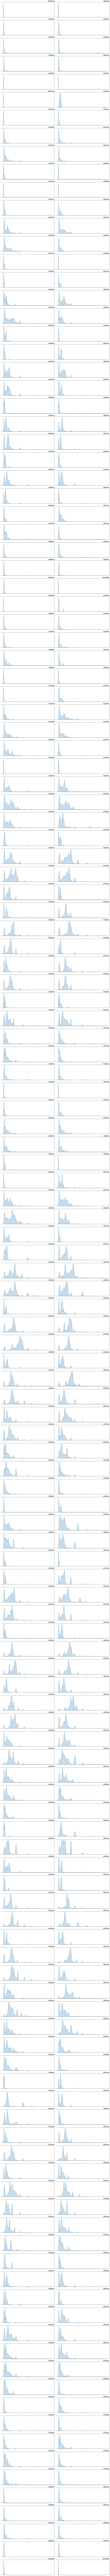

In [17]:
fig, axes = plt.subplots(143, 2, figsize=(15, 350))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = train_df.columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=train_df, x=columns[i], ax=ax, palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.tight_layout()
plt.show()

# Target data distribution

<AxesSubplot:xlabel='target', ylabel='count'>

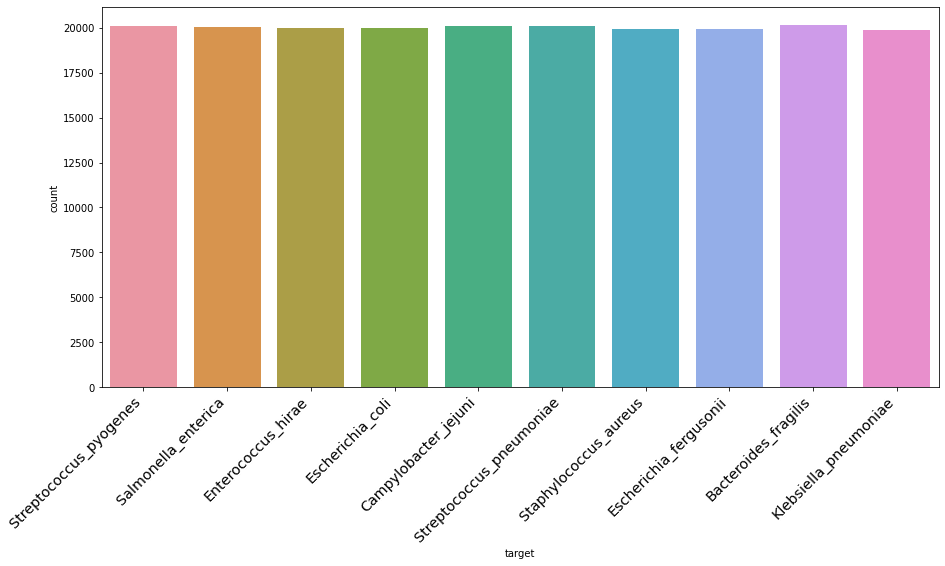

In [18]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
sns.countplot(target)

<AxesSubplot:xlabel='count', ylabel='target'>

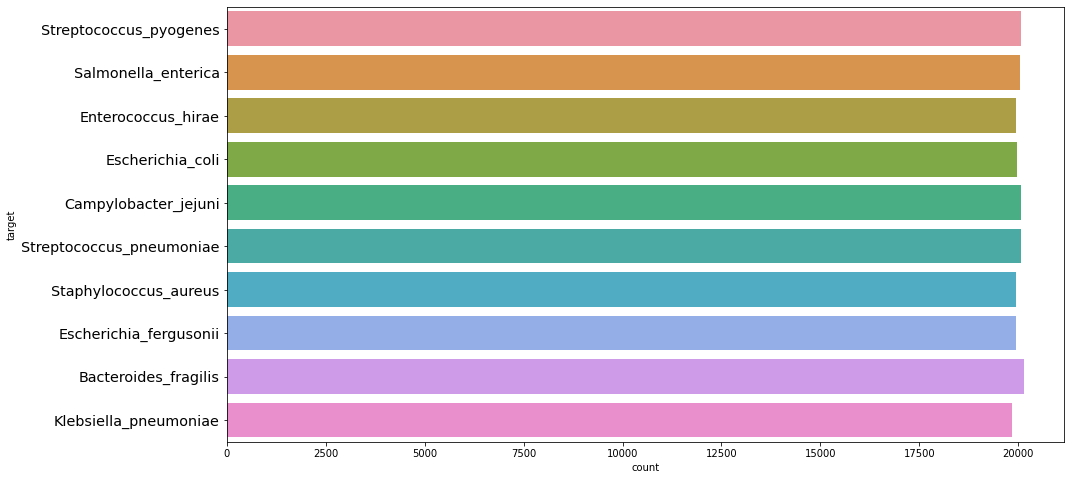

In [19]:
plt.figure(figsize=(15, 8))
plt.yticks(fontsize='x-large')
sns.countplot(y=target)

In [20]:
del train_df, target
gc.collect()

1566

# Test dataset


In [21]:
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2022/test.csv')

In [22]:
test_df.head()

row_id     A0T0G0C10  A0T0G1C9      A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0  200000 -9.536743e-07 -0.000002 -9.153442e-07  0.000024  0.000034 -0.000002   
1  200001 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114  0.001800 -0.000240   
2  200002  4.632568e-08  0.000003  8.465576e-08 -0.000014  0.000007 -0.000005   
3  200003 -9.536743e-07 -0.000008  8.084656e-06  0.000216  0.000420  0.000514   
4  200004 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200 -0.000240   

   A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  A8T1G0C1  \
0  0.000021  0.000024 -0.000009  ...  0.000039  0.000085  0.000055  0.000108   
1  0.001800 -0.000114  0.000957  ... -0.000043  0.000914 -0.000043 -0.000086   
2 -0.000004  0.000003  0.000004  ...  0.000041  0.000102  0.000084  0.000111   
3  0.000452  0.000187 -0.000005  ...  0.000069  0.000158  0.000098  0.000175   
4 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086 -0.000043 -0.000086   

   A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0     A10T0G0C0  
0  0.000090  0.000059  0.000010  0.000006  0.000027  4.632568e-08  
1 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07  
2  0.000117  0.000070  0.000020  0.000030  0.000021  4.632568e-08  
3  0.000217  0.000150  0.000018  0.000016  0.000051 -9.536743e-07  
4  0.000914 -0.000043 -0.000010 -0.000010  0.000990 -9.536743e-07  

[5 rows x 287 columns]

In [23]:
test_df.tail()

row_id     A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
99995  299995 -9.536743e-07 -0.000008 -0.000043 -0.000108 -0.000194 -0.000234   
99996  299996 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   
99997  299997 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   
99998  299998 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   
99999  299999 -9.536743e-07 -0.000009 -0.000040 -0.000111 -0.000195 -0.000238   

       A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  \
99995 -0.000195 -0.000110 -0.000043  ...  0.000159  0.000559  0.000489   
99996 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086 -0.000043   
99997 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086 -0.000043   
99998 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086 -0.000043   
99999 -0.000189 -0.000110 -0.000042  ...  0.000304  0.000765  0.000424   

       A8T1G0C1  A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0  \
99995  0.000499  0.000899  0.000443  0.000047  0.000148  0.000101   
99996 -0.000086 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010   
99997  0.000914 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010   
99998 -0.000086 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010   
99999  0.000834  0.000875  0.000485  0.000128  0.000144  0.000148   

          A10T0G0C0  
99995  4.046326e-06  
99996 -9.536743e-07  
99997 -9.536743e-07  
99998 -9.536743e-07  
99999  2.046326e-06  

[5 rows x 287 columns]

In [24]:
test_df.drop(['row_id'], axis=1, inplace=True)

<h3>Summary Statistics</h3>

In [25]:
pd.set_option('display.max_rows', None)

In [26]:
test_df.describe().T

count          mean       std           min           25%  \
A0T0G0C10  100000.0  6.635157e-07  0.000075 -9.536743e-07 -9.536743e-07   
A0T0G1C9   100000.0 -2.069683e-06  0.000158 -9.536743e-06 -9.536743e-06   
A0T0G2C8   100000.0 -1.670571e-05  0.000254 -4.291534e-05 -4.291534e-05   
A0T0G3C7   100000.0 -9.132418e-06  0.000443 -1.144409e-04 -1.144409e-04   
A0T0G4C6   100000.0  1.653384e-06  0.000664 -2.002716e-04 -2.002716e-04   
A0T0G5C5   100000.0  2.737423e-05  0.000873 -2.403259e-04 -2.403259e-04   
A0T0G6C4   100000.0  1.951145e-05  0.000830 -2.002716e-04 -2.002716e-04   
A0T0G7C3   100000.0 -1.605095e-05  0.000389 -1.144409e-04 -1.144409e-04   
A0T0G8C2   100000.0 -2.448864e-05  0.000189 -4.291534e-05 -4.291534e-05   
A0T0G9C1   100000.0 -8.221383e-06  0.000013 -9.536743e-06 -9.536743e-06   
A0T0G10C0  100000.0 -5.478143e-07  0.000012 -9.536743e-07 -9.536743e-07   
A0T1G0C9   100000.0  2.104590e-05  0.000162 -9.536743e-06 -9.536743e-06   
A0T1G1C8   100000.0 -5.441627e-05  0.000148 -8.583069e-05 -8.583069e-05   
A0T1G2C7   100000.0 -1.724211e-04  0.000584 -3.433228e-04 -3.433228e-04   
A0T1G3C6   100000.0 -2.047444e-04  0.001308 -8.010864e-04 -8.010864e-04   
A0T1G4C5   100000.0 -1.569802e-04  0.002033 -1.201630e-03 -1.201630e-03   
A0T1G5C4   100000.0  1.284803e-04  0.002188 -1.201630e-03 -1.201630e-03   
A0T1G6C3   100000.0 -1.032712e-04  0.001493 -8.010864e-04 -8.010864e-04   
A0T1G7C2   100000.0 -9.194336e-05  0.000808 -3.433228e-04 -3.433228e-04   
A0T1G8C1   100000.0 -4.907251e-05  0.000236 -8.583069e-05 -8.583069e-05   
A0T1G9C0   100000.0 -7.572433e-06  0.000080 -9.536743e-06 -9.536743e-06   
A0T2G0C8   100000.0 -2.463811e-05  0.000153 -4.291534e-05 -4.291534e-05   
A0T2G1C7   100000.0 -2.100097e-04  0.000479 -3.433228e-04 -3.433228e-04   
A0T2G2C6   100000.0 -4.794089e-04  0.001125 -1.201630e-03 -1.201630e-03   
A0T2G3C5   100000.0 -5.584955e-04  0.002375 -2.403259e-03 -2.403259e-03   
A0T2G4C4   100000.0 -3.006136e-04  0.003182 -3.004074e-03 -3.004074e-03   
A0T2G5C3   100000.0 -3.300885e-04  0.002616 -2.403259e-03 -2.403259e-03   
A0T2G6C2   100000.0 -3.146052e-04  0.001522 -1.201630e-03 -1.201630e-03   
A0T2G7C1   100000.0 -1.528436e-04  0.000642 -3.433228e-04 -3.433228e-04   
A0T2G8C0   100000.0 -2.879507e-05  0.000161 -4.291534e-05 -4.291534e-05   
A0T3G0C7   100000.0 -5.126069e-05  0.000379 -1.144409e-04 -1.144409e-04   
A0T3G1C6   100000.0 -4.057209e-04  0.000876 -8.010864e-04 -8.010864e-04   
A0T3G2C5   100000.0 -8.213655e-04  0.001871 -2.403259e-03 -2.183259e-03   
A0T3G3C4   100000.0 -7.826846e-04  0.003138 -4.005432e-03 -3.335432e-03   
A0T3G4C3   100000.0 -7.513748e-04  0.003105 -4.005432e-03 -3.487432e-03   
A0T3G5C2   100000.0 -6.269713e-04  0.002045 -2.403259e-03 -2.403259e-03   
A0T3G6C1   100000.0 -1.761116e-04  0.001074 -8.010864e-04 -8.010864e-04   
A0T3G7C0   100000.0 -5.304216e-05  0.000354 -1.144409e-04 -1.144409e-04   
A0T4G0C6   100000.0 -7.323311e-05  0.000526 -2.002716e-04 -2.002716e-04   
A0T4G1C5   100000.0 -4.441884e-04  0.001290 -1.201630e-03 -1.201630e-03   
A0T4G2C4   100000.0 -9.013397e-04  0.002275 -3.004074e-03 -3.004074e-03   
A0T4G3C3   100000.0 -9.594766e-04  0.002745 -4.005432e-03 -3.005432e-03   
A0T4G4C2   100000.0 -7.253541e-04  0.002386 -3.004074e-03 -2.164074e-03   
A0T4G5C1   100000.0 -3.795474e-04  0.001370 -1.201630e-03 -1.201630e-03   
A0T4G6C0   100000.0 -7.203219e-05  0.000506 -2.002716e-04 -2.002716e-04   
A0T5G0C5   100000.0 -7.249178e-06  0.000725 -2.403259e-04 -2.403259e-04   
A0T5G1C4   100000.0  2.610134e-04  0.001794 -1.201630e-03 -1.201630e-03   
A0T5G2C3   100000.0  1.677200e-04  0.002321 -2.403259e-03 -8.762593e-04   
A0T5G3C2   100000.0 -1.512881e-05  0.002262 -2.403259e-03 -9.932593e-04   
A0T5G4C1   100000.0 -9.139598e-05  0.001641 -1.201630e-03 -1.201630e-03   
A0T5G5C0   100000.0 -3.140501e-05  0.000641 -2.403259e-04 -2.403259e-04   
A0T6G0C4   100000.0  1.505473e-04  0.000939 -2.002716e-04 -2.002716e-04   
A0T6G1C3   100000.0  6.116585e-04  0.00

In [27]:
pd.set_option('display.max_rows', False)

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 286 entries, A0T0G0C10 to A10T0G0C0
dtypes: float64(286)
memory usage: 218.2 MB


In [29]:
test_df.dtypes.value_counts()

float64    286
dtype: int64

In [30]:
print('Dataset shape: ', test_df.shape)

Dataset shape:  (100000, 286)


In [31]:
print("There are", test_df.isna().any().sum(), "missing values")

There are 0 missing values


# Feature data distributionpd.set_option('display.max_columns', None)

In [32]:
print("There are", test_df.duplicated().sum(), "rows with duplicated data")

There are 26779 rows with duplicated data


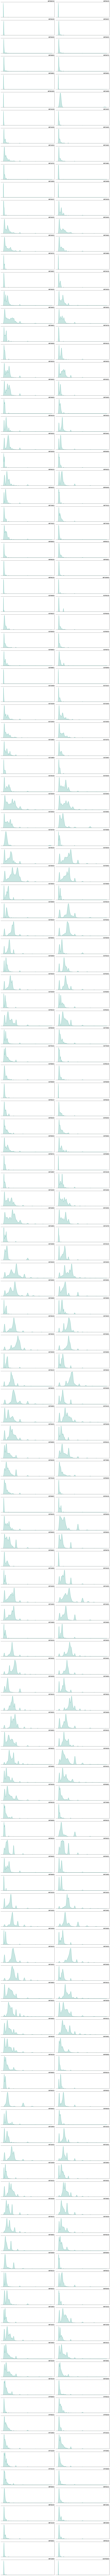

In [33]:
fig, axes = plt.subplots(143, 2, figsize=(15, 350))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = test_df.columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=test_df, x=columns[i], ax=ax, palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.tight_layout()
plt.show()

In [34]:
del test_df
gc.collect()

2521